# Binary Logistic Regression:

  ## Conditions and prerequisits
  
  - 1. dependent variable should be binary
  - 2. observations should be independent of each other
  - 3. Little or no multicollinearity among the independent variables i.e. low correlation between them
  - 4. Independent variables are linearly related to the log odds
  - 5. Large sample size


### Sources: 
  - https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
  - https://www.statisticssolutions.com/assumptions-of-logistic-regression/
  

# Importing libraries and packages

In [193]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading the dataset

In [154]:
dataset = pd.read_excel('../dataset/dataset.xlsx')

# Dropping patient IDs useless information for our models

In [155]:
dataset = dataset.drop(columns='Patient ID')

# Checking If data has a good format and type

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Columns: 151 entries, original_shape_Elongation to Label
dtypes: float64(150), int64(1)
memory usage: 4.1 MB


#### All looks fine types are float64 and label, Id are int64

# Checking data values to get a feel of the values

In [157]:
dataset.describe()

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,...,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,0.666190,2.462975,0.590587,4.212117,1497.921542,1594.268004,2119.089859,271.458163,2.968610,11.251502,...,263.808079,0.351824,3.164037,0.159556,0.458397,1.292847,0.931269,0.905466,73.400175,0.432903
std,0.168063,0.546251,0.272699,4.286353,1289.535822,1387.119079,1528.700938,218.219184,3.454322,8.819559,...,2184.304828,0.216732,1.182988,0.162182,0.243215,0.247532,0.035136,0.512119,81.520035,0.495547
min,0.039069,0.000000,-1.005865,0.083283,1.000000,1.000000,1.000000,0.000000,0.054849,1.256063,...,0.030881,0.058536,1.284810,0.000000,0.122810,0.907201,0.811843,0.234128,3.099939,0.000000
25%,0.550945,2.153519,0.450615,0.963731,316.233814,327.236986,637.213037,54.969021,0.654501,4.320566,...,10.276716,0.191192,2.531290,0.043387,0.322079,1.154897,0.902421,0.628734,22.119894,0.000000
50%,0.677985,2.371766,0.580983,2.686606,1247.979233,1297.284496,2121.746771,249.695632,1.718228,8.927913,...,31.876325,0.295743,2.917387,0.086336,0.410345,1.224399,0.920535,0.801215,35.270240,0.000000
75%,0.793857,2.665746,0.726457,6.188729,2428.843420,2579.808869,3397.403762,453.547995,3.987678,15.864163,...,111.915767,0.468013,3.432697,0.248412,0.530553,1.356257,0.962220,1.035546,102.038460,1.000000
max,1.000000,8.111111,2.666667,29.198575,6454.319835,6484.443965,6308.111352,913.448742,31.799360,71.411609,...,99073.022883,2.957963,22.889047,0.929873,5.265915,3.486119,1.000000,9.730689,675.982582,1.000000


# Getting Label and features

In [158]:
label = dataset['Label']
features = dataset.drop('Label', axis=1)

# Getting dependent variable and independent variables column names

In [159]:
columns = dataset.columns
label_columns = columns[-1]
features_columns = columns[:-1]

# Applying standard scaler 

In [160]:
min_max_scaler = preprocessing.MinMaxScaler()
normalized_features = min_max_scaler.fit_transform(features)
normalized_features = pd.DataFrame(normalized_features, columns = features_columns)

# Plotting dependent variable relatively to independent variables to get a feel of the data

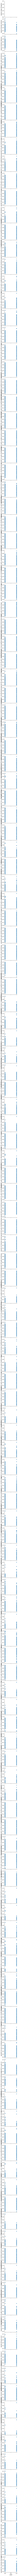

In [118]:
newDataset = normalized_features
newDataset["Label"]=label
sns.pairplot(data=newDataset,x_vars=label_columns,y_vars=features_columns)

#### To be honest nothing very interesting appears

# Dropping one of the highly correlated independent variables 

In [161]:
correlation = normalized_features.corr().abs()
upper_tri = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
normalized_features.drop(to_drop, axis=1, inplace=True)
normalized_features

,original_shape_Elongation,original_firstorder_Kurtosis,wavelet-LHL_glrlm_RunVariance,wavelet-LLH_glrlm_LongRunLowGrayLevelEmphasis,wavelet-HHL_glrlm_LongRunEmphasis,log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet2-LLH_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-HHH_firstorder_InterquartileRange,wavelet-LHH_firstorder_RobustMeanAbsoluteDeviation,...,wavelet-LLL_firstorder_Kurtosis,wavelet-LHH_glcm_Imc2,wavelet2-HLL_firstorder_RootMeanSquared,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn
0,0.647935,0.347386,0.246393,0.206122,0.230940,0.220965,0.093880,0.293338,0.261450,0.156916,...,0.296004,0.028191,0.301486,0.037707,0.040427,0.077050,0.248931,0.068252,0.257965,0.914185
1,0.740719,0.257030,0.104909,0.293330,0.083340,0.388438,0.058497,0.058145,0.229967,0.098605,...,0.177956,0.052903,0.026757,0.027430,0.000323,0.069708,0.011325,0.054280,0.105061,0.495763
2,0.604322,0.319409,0.237749,0.267117,0.275635,0.210341,0.175660,0.433827,0.195913,0.132946,...,0.290809,0.029771,0.137482,0.046766,0.636218,0.089165,0.297037,0.062854,0.274669,0.963087
3,0.363880,0.361586,0.071974,0.146672,0.059131,0.195667,0.036237,0.081964,0.214162,0.112603,...,0.275611,0.057729,0.041565,0.020422,0.001490,0.081909,0.025670,0.053887,0.154981,0.527741
4,0.813234,0.346942,0.042368,0.134097,0.053028,0.337768,0.032989,0.083386,0.222152,0.086719,...,0.249382,0.067978,0.041161,0.018702,0.000665,0.036533,0.018253,0.044263,0.100246,0.503155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.193591,0.387751,0.014555,0.144846,0.023709,0.035550,0.000942,0.009346,0.040434,0.038962,...,0.207516,0.002975,0.068284,0.008931,0.000223,0.050876,0.026926,0.022047,0.195908,0.598221
3558,0.483669,0.306355,0.156548,0.200106,0.332001,0.232377,0.107206,0.096015,0.150461,0.083629,...,0.189327,0.011592,0.421477,0.043753,0.004544,0.093819,0.587706,0.053980,0.227915,0.958770
3559,0.432556,0.414641,0.203718,0.267214,0.079128,0.229708,0.058400,0.065725,0.051528,0.048465,...,0.406195,0.008663,0.009366,0.024809,0.003397,0.085132,0.030843,0.038238,0.272384,0.444693
3560,0.608817,0.271966,0.053013,0.078583,0.038440,0.157088,0.012287,0.013403,0.060004,0.026704,...,0.164249,0.057214,0.022034,0.012490,0.000145,0.041202,0.078155,0.025616,0.144781,0.442866


# Applying recursive feature elimination with cross validation RFECV 

In [162]:
lgr = LogisticRegression()
rfecv = RFECV(estimator=lgr, step=1, cv=StratifiedKFold(10))
rfecv.fit(normalized_features, label)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression())

# Checking optimal number of features

In [172]:
rfecv.n_features_

35

# Visualizing results

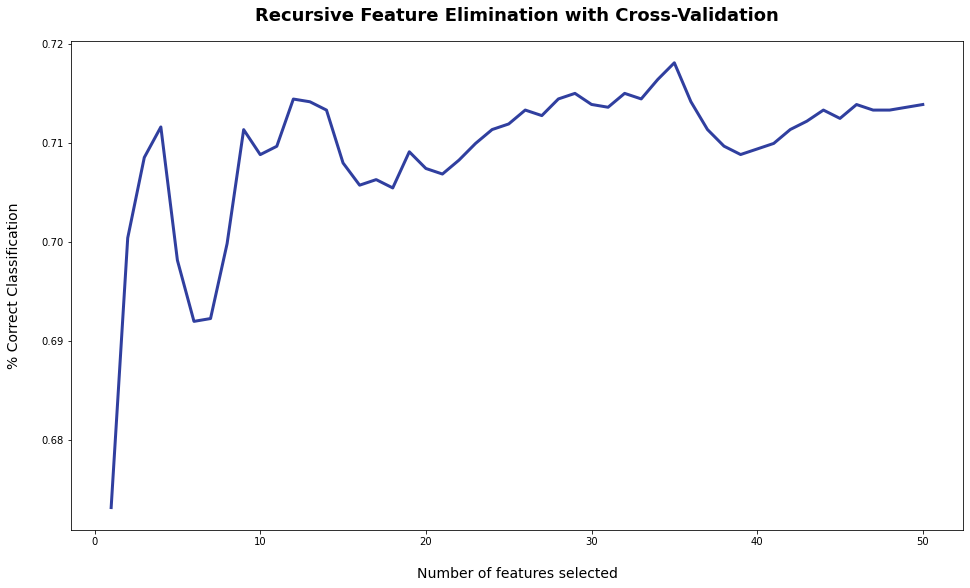

In [173]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

# Getting optimal features

In [174]:
selected_normalized_features = normalized_features.drop(normalized_features.columns[np.where(rfecv.support_ == False)[0]], axis=1)
selected_normalized_features

,original_shape_Elongation,original_firstorder_Kurtosis,wavelet-LHL_glrlm_RunVariance,wavelet-LLH_glrlm_LongRunLowGrayLevelEmphasis,wavelet-HHH_firstorder_InterquartileRange,wavelet-LHH_firstorder_RobustMeanAbsoluteDeviation,wavelet2-HLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis,wavelet-LHL_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-LLH_firstorder_Kurtosis,...,wavelet2-HHH_firstorder_InterquartileRange,wavelet2-LHL_glrlm_GrayLevelNonUniformityNormalized,wavelet2-LHH_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-HLH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_firstorder_Kurtosis,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet2-LLH_firstorder_Kurtosis,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn
0,0.647935,0.347386,0.246393,0.206122,0.261450,0.156916,0.003355,0.036777,0.068912,0.071890,...,0.150423,0.375724,0.364772,0.022043,0.296004,0.037707,0.077050,0.068252,0.257965,0.914185
1,0.740719,0.257030,0.104909,0.293330,0.229967,0.098605,0.113130,0.035688,0.118663,0.041957,...,0.098680,0.410352,0.410750,0.015390,0.177956,0.027430,0.069708,0.054280,0.105061,0.495763
2,0.604322,0.319409,0.237749,0.267117,0.195913,0.132946,0.001862,0.023949,0.028741,0.070728,...,0.137322,0.406330,0.312070,0.036395,0.290809,0.046766,0.089165,0.062854,0.274669,0.963087
3,0.363880,0.361586,0.071974,0.146672,0.214162,0.112603,0.040503,0.081539,0.345758,0.065789,...,0.122361,0.460824,0.464528,0.014468,0.275611,0.020422,0.081909,0.053887,0.154981,0.527741
4,0.813234,0.346942,0.042368,0.134097,0.222152,0.086719,0.031107,0.057537,0.381394,0.046693,...,0.104045,0.448284,0.448464,0.013466,0.249382,0.018702,0.036533,0.044263,0.100246,0.503155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.193591,0.387751,0.014555,0.144846,0.040434,0.038962,0.005733,0.035140,0.326683,0.020287,...,0.049770,0.482150,0.324591,0.013534,0.207516,0.008931,0.050876,0.022047,0.195908,0.598221
3558,0.483669,0.306355,0.156548,0.200106,0.150461,0.083629,0.000331,0.007558,0.015895,0.142785,...,0.142443,0.237100,0.338730,0.051063,0.189327,0.043753,0.093819,0.053980,0.227915,0.958770
3559,0.432556,0.414641,0.203718,0.267214,0.051528,0.048465,0.229354,0.164444,0.272671,0.053553,...,0.028627,0.535104,0.364163,0.016187,0.406195,0.024809,0.085132,0.038238,0.272384,0.444693
3560,0.608817,0.271966,0.053013,0.078583,0.060004,0.026704,0.227337,0.056250,0.223068,0.036133,...,0.031704,0.727230,0.418777,0.011911,0.164249,0.012490,0.041202,0.025616,0.144781,0.442866


# Splitting data to train and test the lgr model

In [179]:
X_train, X_test, y_train, y_test = train_test_split(selected_normalized_features, label, test_size=0.25, random_state=21,stratify=label)

# Training the model

In [180]:
clf = LogisticRegression().fit(X_train, y_train)

# Getting Predictions

In [191]:
prediction = clf.predict(X_test)

# Getting results and checking performance

In [194]:
print('Logistic Regression test set confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test, prediction), index=['actual: no cancer', 'actual: cancer'], columns=['pred: no cancer', 'pred: cancer']), '\n')
print(classification_report(y_test, prediction))

Logistic Regression test set confusion matrix:
                   pred: no cancer  pred: cancer
actual: no cancer              413            92
actual: cancer                 145           241 

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       505
           1       0.72      0.62      0.67       386

    accuracy                           0.73       891
   macro avg       0.73      0.72      0.72       891
weighted avg       0.73      0.73      0.73       891

